# Study & Simulation of a Potential Betting based Business on Premier League Games

## 1. Libraries

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

## 2. Setup

In [30]:
_path = "C:\\Users\\nifaullah\\Downloads\\msba\\Classes_Spring\\Simulation\\Project\\"
_filename = "data.xlsx"
_fixed_costs = 1000

def GetPoints(win_prob, draw_prob, loss_Prob, matches = 38):
    raw_val = np.random.multinomial(matches, [win_prob, draw_prob, loss_Prob], size=10000)
    average_val = np.mean(raw_val, axis = 0)
    average_points = average_val[0] * 3 + average_val[1] * 1
    return round(average_points,2)

def PrepareData():   
    df = pd.read_excel(f"{_path}{_filename}")
    df = df [["Team","Win_Prob", "Draw_Prob", "Loss_Prob"]]
    
    df["predicted_points"] = df.apply(lambda x: GetPoints(x.Win_Prob, x.Draw_Prob, x.Loss_Prob), axis = 1)
    df["predicted_position"] = df["predicted_points"].rank(method='max', ascending = False)
    
    df["winning_league_prob"] = df[["predicted_points", "predicted_position"]]\
        .apply(lambda x: x[0]/114, axis=1)
    df["winning_league_odds"] = df[["winning_league_prob", "predicted_position"]]\
        .apply(lambda x: (1 + ((1 - x[0]) * (1 + x[1]))), axis=1)
        
    df["top_4_prob"] = df[["predicted_points", "predicted_position"]]\
        .apply(lambda x: x[0]/85, axis=1)
    df["top_4_odds"] = df[["top_4_prob", "predicted_position"]]\
        .apply(lambda x: (1 + ((1 - x[0]) * (1 + (x[1]/3)))), axis=1)
        
    df["relegation_prob"] = df["winning_league_prob"].apply(lambda x: 1 - x)
    df["relegation_odds"] = df[["relegation_prob", "predicted_position"]]\
        .apply(lambda x: (1 + ((1 - x[0]) * (1 + (21 - x[1])//3))), axis=1)
    return df

In [168]:
df = PrepareData()
df = df.sort_values("predicted_position")
df

,Team,Win_Prob,Draw_Prob,Loss_Prob,predicted_points,predicted_position,winning_league_prob,winning_league_odds,top_4_prob,top_4_odds,relegation_prob,relegation_odds
10,Manchester City,0.684211,0.163158,0.152632,84.13,1.0,0.737982,1.524035,0.989765,1.013647,0.262018,6.165877
5,Chelsea,0.578947,0.221053,0.200000,74.31,2.0,0.651842,2.044474,0.874235,1.209608,0.348158,5.562895
9,Liverpool,0.563158,0.257895,0.178947,73.90,3.0,0.648246,2.407018,0.869412,1.261176,0.351754,5.537719
16,Tottenham Hotspurs,0.578947,0.200000,0.221053,73.50,4.0,0.644737,2.776316,0.864706,1.315686,0.355263,4.868421
0,Arsenal,0.552632,0.205263,0.242105,70.72,5.0,0.620351,3.277895,0.832000,1.448000,0.379649,4.722105
11,Manchester United,0.531579,0.257895,0.210526,70.47,6.0,0.618158,3.672895,0.829059,1.512824,0.381842,4.708947
19,Wolverhampton Wanderers,0.421053,0.236842,0.342105,57.08,7.0,0.500702,4.994386,0.671529,2.094902,0.499298,3.503509
8,Leicester City,0.384211,0.242105,0.373684,52.89,8.0,0.463947,5.824474,0.622235,2.385137,0.536053,3.319737
7,Everton,0.357895,0.284211,0.357895,51.47,9.0,0.451491,6.485088,0.605529,2.577882,0.548509,3.257456
18,West Ham United,0.342105,0.278947,0.378947,49.64,10.0,0.435439,7.210175,0.584000,2.802667,0.564561,2.741754


In [3]:
def GetProfits(total_revenue ,revenue_split, is_true_arr, odds):
    profit = total_revenue
    for i in range(len(odds)):
        rev = total_revenue * revenue_split[i]
        profit += (is_true_arr[i] * odds[i] * rev)
    return profit
league_winner_odds = list(df["winning_league_odds"])
top_4_odds = list(df["top_4_odds"])
relegation_odds = list(df["relegation_odds"])
revenue = 100

In [4]:
def GetProfitReport(league_winner_profit, top_4_profit, relegation_profit):
    league_winner_profit = round(league_winner_profit,2)
    top_4_profit = round(top_4_profit,2)
    relegation_profit = round(relegation_profit,2)
    total_profit = round(league_winner_profit + top_4_profit + relegation_profit - _fixed_costs, 2)
    html_string = """
    <table>
        <tr>
            <th>Betting Type</th>
            <th>Profit</th>
        </tr>
        <tr>
            <td>League Winner</td>
            <td>{0}</td>
        </tr>
        <tr>
            <td>Top 4</td>
            <td>{1}</td>
        </tr>
        <tr>
            <td>Relegation</td>
            <td>{2}</td>
        </tr>
        <tr>
            <td>Total</td>
            <td>{3}</td>
        </tr>
    </table>""".format(league_winner_profit, top_4_profit, relegation_profit, total_profit)
    display(HTML(html_string))
    var = [league_winner_profit, top_4_profit, relegation_profit, total_profit]
    labels = ["League Winner Profit", "Top 4 Profit", "Relegation Profit", "Total Profit"]
    sns.barplot(x = labels, y = var)

In [54]:
def GetProfitsByAmounts(bets, revenue_splits, is_true_arrs):
    revenue_split_league = revenue_splits[0]
    revenue_split_top_4 = revenue_splits[1]
    revenue_split_relegation = revenue_splits[2]
    is_true_arr_league = is_true_arrs[0]
    is_true_arr_top_4 = is_true_arrs[1]
    is_true_arr_relegation = is_true_arrs[2]
    total_profits = []
    
    for bet in bets:
        league_winner_profit = GetProfits(bet, revenue_split_league, is_true_arr_league, league_winner_odds)
        top_4_profit = GetProfits(bet, revenue_split_top_4, is_true_arr_top_4, top_4_odds)
        relegation_profit = GetProfits(bet, revenue_split_relegation, is_true_arr_relegation, relegation_odds)
        total_profits.append(league_winner_profit + top_4_profit + relegation_profit - _fixed_costs)
    print(total_profits)
    sns.lineplot(x = bets, y = total_profits)

## 3. Simulation Analysis

### 3.1 Worst Case Analysis

#### 3.1.1 Scenario
    i) Average Bets of $1000 on each type
    ii) All bets were made on highest possible odds
    iii) Event with highest odds came true

<h4>Observation:</h4> As expected the business is running at a loss

In [331]:
revenue = 1000

revenue_split_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
is_true_arr_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
league_winner_profit = GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


revenue_split_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
is_true_arr_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
top_4_profit = GetProfits(revenue, revenue_split_top_4, is_true_arr_league_top_4, top_4_odds)

revenue_split_relegation = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
is_true_arr_relegation = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
relegation_profit = GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

Betting Type,Profit
League Winner,-14648.42
Top 4,-4556.71
Relegation,-5167.72
Total,-25372.85


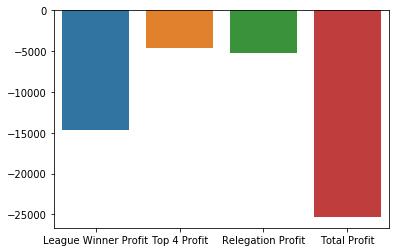

In [332]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)


#### 3.1.2 Scenario 
    i) How profits change with increase in average bet amount
    ii) All bets were made on highest possible odds
    iii) Event with highest odds came true
    
<h4>Observation:</h4> As expected loss is steeply increasing with increase in average betting amount

[-1243.7284623323014, -3437.2846233230134, -13186.423116615068, -25372.846233230135, -122864.23116615068]


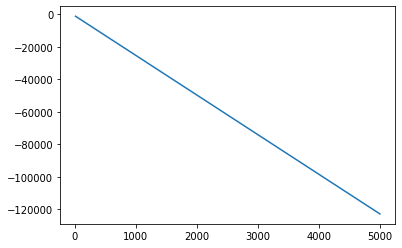

In [69]:
bets = [10, 100, 500, 1000, 5000]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

### 3.2 Best Case Analysis

#### 3.2.1 Scenario
    i) Average Bets of $1000 on each type
    ii) None of the bets were successful

<h4>Observation:</h4> At an average bets of around 1000 dollars our business is still at a lost. But one can easily see that once the average bets raise to a minimum of 3334 for each type, business starts profiting

In [72]:
revenue = 1000

revenue_split_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
is_true_arr_league = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
league_winner_profit = GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


revenue_split_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
is_true_arr_top_4 = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
top_4_profit = GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

revenue_split_relegation = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
is_true_arr_relegation = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
relegation_profit = GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

Betting Type,Profit
League Winner,1000.0
Top 4,1000.0
Relegation,1000.0
Total,2000.0


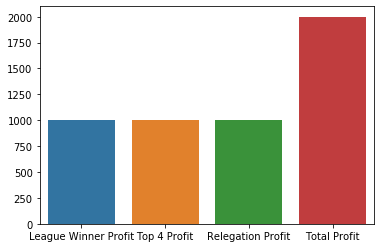

In [73]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)


#### 3.2.2 Scenario 
    i) How profits change with increase in average bet amount
    ii) Event with With no bets came true
    
<h4>Observation:</h4> As expected profit steeply increases with increase in average bets on unsuccessful events.

[-970.0, -700.0, 500.0, 2000.0, 14000.0]


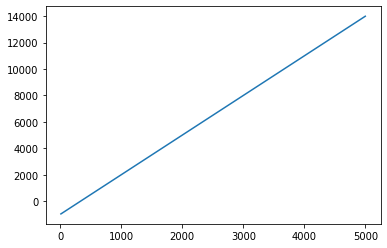

In [74]:
bets = [10, 100, 500, 1000, 5000]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

### 3.3 Risk Based Simulation and Analysis

#### 3.3.1 Defining Risk Based Probabilities


In [182]:
df = df.round(5)
sum_val = df["winning_league_prob"].sum()
df["winning_league_risk"] = df["winning_league_prob"].apply(lambda x: x/sum_val)
sum_val = df["top_4_prob"].sum()
df["top_4_risk"] = df["top_4_prob"].apply(lambda x: x/sum_val)
sum_val = df["relegation_prob"].sum()
df["relegation_risk"] = df["relegation_prob"].apply(lambda x: x/sum_val)

In [330]:
df.to_csv("Betting_Model.csv", index = False)

In [183]:
df.head()

,Team,Win_Prob,Draw_Prob,Loss_Prob,predicted_points,predicted_position,winning_league_prob,winning_league_odds,top_4_prob,top_4_odds,relegation_prob,relegation_odds,winning_league_risk,top_4_risk,relegation_risk
10,Manchester City,0.68421,0.16316,0.15263,84.13,1.0,0.73798,1.52404,0.98976,1.01365,0.26202,6.16588,0.078416,0.078415,0.024745
5,Chelsea,0.57895,0.22105,0.20000,74.31,2.0,0.65184,2.04447,0.87424,1.20961,0.34816,5.56289,0.069263,0.069263,0.032880
9,Liverpool,0.56316,0.25789,0.17895,73.90,3.0,0.64825,2.40702,0.86941,1.26118,0.35175,5.53772,0.068881,0.068880,0.033219
16,Tottenham Hotspurs,0.57895,0.20000,0.22105,73.50,4.0,0.64474,2.77632,0.86471,1.31569,0.35526,4.86842,0.068508,0.068508,0.033550
0,Arsenal,0.55263,0.20526,0.24211,70.72,5.0,0.62035,3.27789,0.83200,1.44800,0.37965,4.72211,0.065917,0.065917,0.035854


#### 3.3.2 Uniformly Distributed Revenue

i) Bets are assumed to be uniformly distributed although this is very rarely the case.

##### 3.3.2.1 Worst Case Analysis
    i) Event with high return comes true.
    
<h6>Observation: </h6> For the business to be profitable, Average betting amount should be little more than 1000 dollars.

In [82]:
revenue = 1000

revenue_split_league = [1/20.]*20
is_true_arr_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
league_winner_profit = GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


revenue_split_top_4 = [1/20.]*20
is_true_arr_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1]
top_4_profit = GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

revenue_split_relegation = [1/20.]*20
is_true_arr_relegation = [-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
relegation_profit = GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

Betting Type,Profit
League Winner,217.58
Top 4,-2.6
Relegation,136.4
Total,-648.62


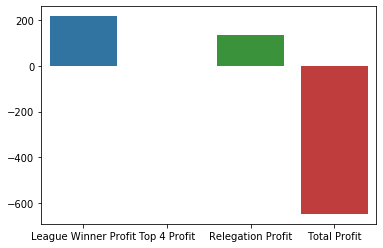

In [83]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

[-990.9340701754386, -909.3407017543859, -546.7035087719298, -93.40701754385975, 3532.9649122807023]


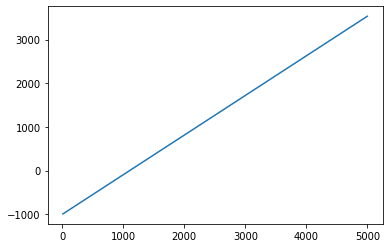

In [81]:
bets = [10, 100, 500, 1000, 5000]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

##### 3.3.2.2 Best Case Analysis
    i) Event with Least return comes true.
    
<h6>Observation: </h6> For the business to be profitable, total betting amount should be little more than 400 dollars for each category.

In [84]:
revenue = 1000

revenue_split_league = [1/20.]*20
is_true_arr_league = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
league_winner_profit = GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


revenue_split_top_4 = [1/20.]*20
is_true_arr_top_4 = [-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
top_4_profit = GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

revenue_split_relegation = [1/20.]*20
is_true_arr_relegation = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1]
relegation_profit = GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

Betting Type,Profit
League Winner,923.82
Top 4,760.23
Relegation,784.75
Total,1468.8


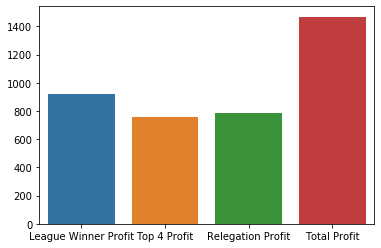

In [85]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

[-975.3119602683179, -753.1196026831785, 234.40198658410736, 1468.8039731682147, 11344.019865841074]


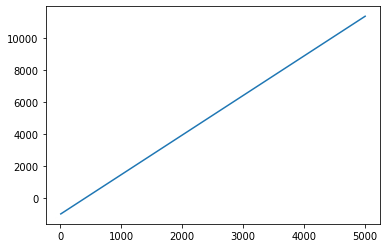

In [93]:
bets = [10, 100, 500, 1000, 5000]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

#### 3.3.3 Risk Based Revenue Distribution

Since the states are discrete, we will draw revenue from a multinomial distribution. Probablities for each team are already standardized such that they sum to 1 at the risk classification step.


##### 3.3.3.1 Worst Case Analysis
    i) Event with high return comes true.
    
<h6>Observation: </h6> For the business to be profitable, Average betting amount should be little more than 500 dollars, which is a marked improvement over the overall worst case and the uniform distribution worst case.

In [243]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_league = np.random.multinomial(1000, list(df["winning_league_risk"]), size=1).tolist()[0]
    is_true_arr_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
    league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


    revenue_split_top_4 = np.random.multinomial(1000, list(df["top_4_risk"]), size=1).tolist()[0]
    is_true_arr_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1]
    top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(1000, list(df["relegation_risk"]), size=1).tolist()[0]
    is_true_arr_relegation = [-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/10000) + 999
top_4_profit = (top_4_profit/10000) + 999
relegation_profit = (relegation_profit/10000) + 999

Betting Type,Profit
League Winner,498.85
Top 4,302.08
Relegation,480.35
Total,281.28


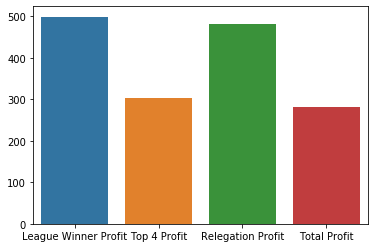

In [244]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

[-987.7058609700722, -877.0586097007224, -385.293048503612, 229.413902992776, 5147.06951496388]


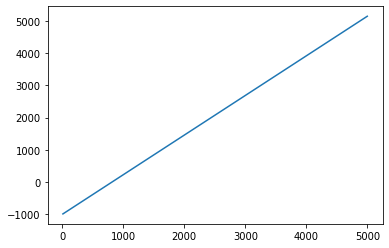

In [245]:
bets = [10, 100, 500, 1000, 5000]
revenue_split_league = [i/1000 for i in revenue_split_league]
revenue_split_top_4 = [i/1000 for i in revenue_split_top_4]
revenue_split_relegation = [i/1000 for i in revenue_split_relegation]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

##### 3.3.3.2 Best Case Analysis
    i) Event with Least return comes true.
    
<h6>Observation: </h6> For the business to be profitable, total betting amount should be little more than 300 dollars for each category.

In [246]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_league = np.random.multinomial(1000, list(df["winning_league_risk"]), size=1).tolist()[0]
    is_true_arr_league = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


    revenue_split_top_4 = np.random.multinomial(1000, list(df["top_4_risk"]), size=1).tolist()[0]
    is_true_arr_top_4 = [-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(1000, list(df["relegation_risk"]), size=1).tolist()[0]
    is_true_arr_relegation = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1]
    relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/10000) + 999
top_4_profit = (top_4_profit/10000) + 999
relegation_profit = (relegation_profit/10000) + 999

Betting Type,Profit
League Winner,880.43
Top 4,659.95
Relegation,724.89
Total,1265.27


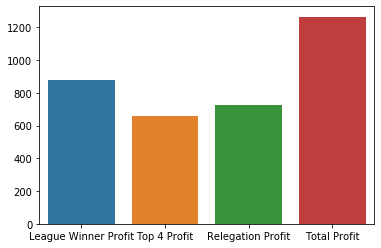

In [247]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

[-970.0, -700.0, 500.0, 2000.0, 14000.0]


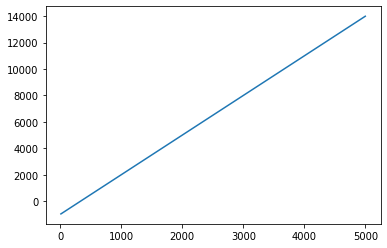

In [242]:
bets = [10, 100, 500, 1000, 5000]
revenue_split_league = [i/1000 for i in revenue_split_league]
revenue_split_top_4 = [i/1000 for i in revenue_split_top_4]
revenue_split_relegation = [i/1000 for i in revenue_split_relegation]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

##### 3.3.3.3 In-Between Analysis - I
    i)Undesirable events with not the worst penalties (i.e worst case scenario excluded) come true
    
<h6>Observation: </h6> Overall below simulation is able to demonstrate that in some case, even if an undesirable outcome happens, which is not so often, our model is able to churn substantial profit.

In [268]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0

for i in range(10000):
    revenue_split_league = np.random.multinomial(1000, list(df["winning_league_risk"]), size=1).tolist()[0]
    for x in range(1,6):
        empty_list = [0.] * 20
        is_true_arr_league = is_true_arr_league = [-1 if idx == x else 0 for idx,j in enumerate(empty_list)]
        league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)

    revenue_split_top_4 = np.random.multinomial(1000, list(df["top_4_risk"]), size=1).tolist()[0]
    for x in range(4,9):
        empty_list = [0.] * 20
        is_true_arr_top_4 = [-1 if ((idx >= x) & (idx <= x+3)) else 0 for idx,j in enumerate(empty_list)]
        top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(1000, list(df["relegation_risk"]), size=1).tolist()[0]
    for x in range(9,14):
        empty_list = [0.] * 20
        is_true_arr_relegation = [-1 if ((idx >= x) & (idx <= x+2)) else 0 for idx,j in enumerate(empty_list)]
        relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/50000) + 999
top_4_profit = (top_4_profit/50000) + 999
relegation_profit = (relegation_profit/50000) + 999

Betting Type,Profit
League Winner,809.14
Top 4,520.89
Relegation,602.6
Total,932.63


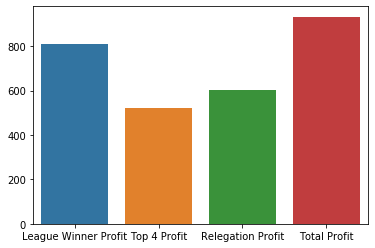

In [269]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

[-980.9793740454077, -809.7937404540763, -48.96870227038187, 902.0625954592363, 8510.312977296182]


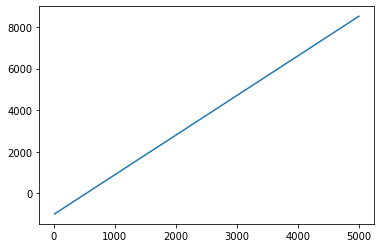

In [270]:
bets = [10, 100, 500, 1000, 5000]
revenue_split_league = [i/1000 for i in revenue_split_league]
revenue_split_top_4 = [i/1000 for i in revenue_split_top_4]
revenue_split_relegation = [i/1000 for i in revenue_split_relegation]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

##### 3.3.3.4 In-Between Analysis - II
    i)Some desirable events come true whilst some other events don't come true
    
<h6>Observation: </h6> Model performance is very close to the best case scenario, with the model churning a substantial profit even when the results are a mixed bag.

In [271]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0

for i in range(10000):
    revenue_split_league = np.random.multinomial(1000, list(df["winning_league_risk"]), size=1).tolist()[0]
    for x in range(0,3):
        empty_list = [0.] * 20
        is_true_arr_league = is_true_arr_league = [-1 if idx == x else 0 for idx,j in enumerate(empty_list)]
        league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)

    revenue_split_top_4 = np.random.multinomial(1000, list(df["top_4_risk"]), size=1).tolist()[0]
    for x in range(0,3):
        empty_list = [0.] * 20
        is_true_arr_top_4 = [-1 if ((idx >= x) & (idx <= x+3)) else 0 for idx,j in enumerate(empty_list)]
        top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(1000, list(df["relegation_risk"]), size=1).tolist()[0]
    for x in range(15,18):
        empty_list = [0.] * 20
        is_true_arr_relegation = [-1 if ((idx >= x) & (idx <= x+2)) else 0 for idx,j in enumerate(empty_list)]
        relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/30000) + 999
top_4_profit = (top_4_profit/30000) + 999
relegation_profit = (relegation_profit/30000) + 999

Betting Type,Profit
League Winner,857.7
Top 4,644.22
Relegation,706.19
Total,1208.11


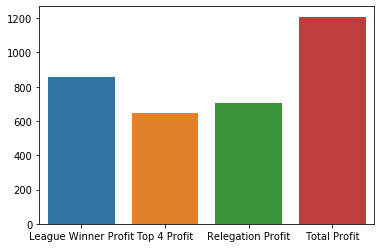

In [272]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

[-980.9793740454077, -809.7937404540763, -48.96870227038187, 902.0625954592363, 8510.312977296182]


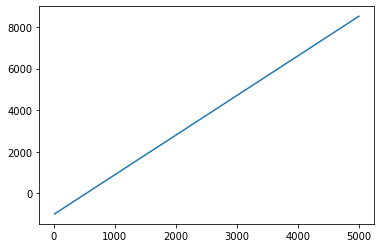

In [270]:
bets = [10, 100, 500, 1000, 5000]
revenue_split_league = [i/1000 for i in revenue_split_league]
revenue_split_top_4 = [i/1000 for i in revenue_split_top_4]
revenue_split_relegation = [i/1000 for i in revenue_split_relegation]
revenue_splits = [revenue_split_league, revenue_split_top_4, revenue_split_relegation]
is_true_arrs = [is_true_arr_league, is_true_arr_top_4, is_true_arr_relegation]
    
GetProfitsByAmounts(bets, revenue_splits,is_true_arrs)

### 4. Category Wise Revenue Distribution

Although so far we've assumed the average betting or revenue to be same for all categories it is rarely the case it works like that. Again like betting for each team betting in each category has it's own risk. From the outset it is quite clear that the probablity of getting premier league winner right at 1/20 is quite high to top 4 and relagation which are at 1/5 and 3/20 respectively.

Before we assign proportionate revenues let's run a single category analysis, where all the revenue comes from betting in only one of the categories

#### 4.1 Independent Category Analysis

##### 4.1.1 Premier League Winner

###### 4.1.1.1 Worst Case Scenario

Betting only on PL Winner is profitable in the worst case provided $3000 is gambled.

In [280]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_league = np.random.multinomial(3000, list(df["winning_league_risk"]), size=1).tolist()[0]
    is_true_arr_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
    league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)

league_winner_profit = (league_winner_profit/10000) + 2999

Betting Type,Profit
League Winner,1493.51
Top 4,0
Relegation,0
Total,493.51


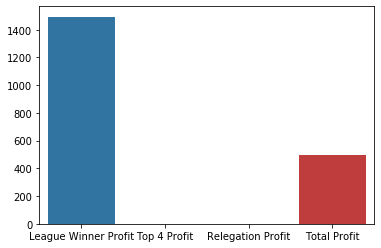

In [281]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

###### 4.1.1.2 Best Case Scenario
The most profitable model so far.

In [282]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_league = np.random.multinomial(3000, list(df["winning_league_risk"]), size=1).tolist()[0]
    is_true_arr_league = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)

league_winner_profit = (league_winner_profit/10000) + 2999

Betting Type,Profit
League Winner,2642.0
Top 4,0
Relegation,0
Total,1642.0


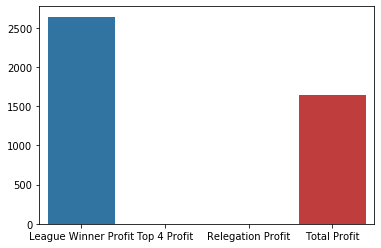

In [283]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

##### 4.1.2 Top 4

###### 4.1.2.1 Worst Case Scenario

Although the Model is running at a loss but the amount lost is very minimal and can be easily made profitable with a little change of luck.

In [292]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_top_4 = np.random.multinomial(3000, list(df["top_4_risk"]), size=1).tolist()[0]
    is_true_arr_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1]
    top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

top_4_profit = (top_4_profit/10000) + 2999

Betting Type,Profit
League Winner,0
Top 4,907.64
Relegation,0
Total,-92.36


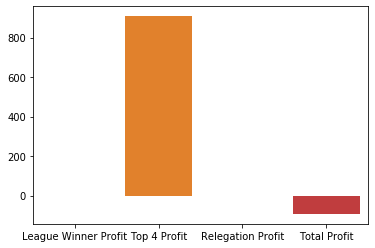

In [293]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

###### 4.1.1.2 Best Case Scenario

Not as good as PL Winner only scenario but still a substantially profitable model with nearly 100 % return

In [294]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_top_4 = np.random.multinomial(3000, list(df["top_4_risk"]), size=1).tolist()[0]
    is_true_arr_top_4 = [-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

top_4_profit = (top_4_profit/10000) + 2999

Betting Type,Profit
League Winner,0
Top 4,1980.24
Relegation,0
Total,980.24


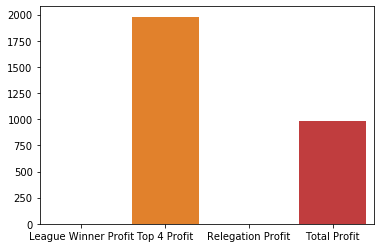

In [295]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

##### 4.1.3 Relagation

###### 4.1.2.1 Worst Case Scenario

Model is profitable even under worst circumstances provided we manage to get bettings of around $ 3000 for this category. 

In [296]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_relegation = np.random.multinomial(3000, list(df["relegation_risk"]), size=1).tolist()[0]
    is_true_arr_relegation = [-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

relegation_profit = (relegation_profit/10000) + 2999

Betting Type,Profit
League Winner,0
Top 4,0
Relegation,1441.33
Total,441.33


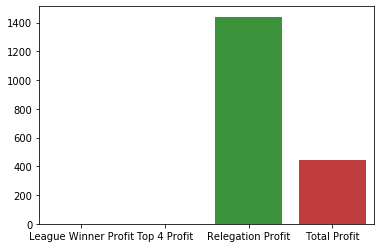

In [297]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

###### 4.1.1.2 Best Case Scenario

Manages to double the investment provided bettings of $ 3000 dollar

In [300]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_relegation = np.random.multinomial(3000, list(df["relegation_risk"]), size=1).tolist()[0]
    is_true_arr_relegation = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1]
    relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

relegation_profit = (relegation_profit/10000) + 2999

Betting Type,Profit
League Winner,0
Top 4,0
Relegation,2175.21
Total,1175.21


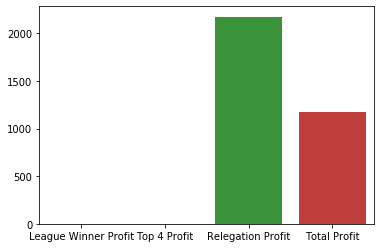

In [301]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

#### 4.2 Revenue Distribution By Category Risk

Amount Betted on Premier League Winner - 375.0
Amount Betted on Top 4 - 1500.0
Amount Betted on Relagation - 1124.9999999999998


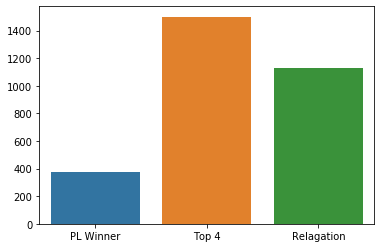

In [314]:
normalizer = (1/20) + (1/5) + (3/20)
prem_winner_pct = (1/20)/normalizer
top_4_pct = (1/5)/normalizer
relegation_pct = (3/20)/normalizer

rev_prem_winner = 3000 * prem_winner_pct
print(f"Amount Betted on Premier League Winner - {rev_prem_winner}")
rev_top_4 = 3000 * top_4_pct
print(f"Amount Betted on Top 4 - {rev_top_4}")
rev_relegation = 3000 * relegation_pct
print(f"Amount Betted on Relagation - {rev_relegation}")

sns.barplot(x=["PL Winner", "Top 4", "Relagation"], y = [rev_prem_winner, rev_top_4, rev_relegation])

##### 4.2.1 Worst Case Analysis
    i) Event with high return comes true.
    
<h6>Observation: </h6> Even under the worst circumstances the model is able to churn a profit provided we have bettings of 3000 proportionately divided based on the risk associated with each category

In [315]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_league = np.random.multinomial(rev_prem_winner, list(df["winning_league_risk"]), size=1).tolist()[0]
    is_true_arr_league = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
    league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


    revenue_split_top_4 = np.random.multinomial(rev_top_4, list(df["top_4_risk"]), size=1).tolist()[0]
    is_true_arr_top_4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1]
    top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(rev_relegation, list(df["relegation_risk"]), size=1).tolist()[0]
    is_true_arr_relegation = [-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/10000) + (rev_prem_winner -1)
top_4_profit = (top_4_profit/10000) + (rev_top_4 -1)
relegation_profit = (relegation_profit/10000) + (rev_relegation -1)

Betting Type,Profit
League Winner,187.25
Top 4,454.29
Relegation,541.87
Total,183.41


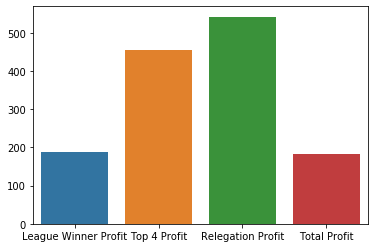

In [317]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

##### 4.2.2 Best Case Analysis
    i) Event with Least return comes true.
    
<h6>Observation: </h6> Manages to double the income.

In [320]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0
for i in range(10000):
    revenue_split_league = np.random.multinomial(rev_prem_winner, list(df["winning_league_risk"]), size=1).tolist()[0]
    is_true_arr_league = [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)


    revenue_split_top_4 = np.random.multinomial(rev_top_4, list(df["top_4_risk"]), size=1).tolist()[0]
    is_true_arr_top_4 = [-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(rev_relegation, list(df["relegation_risk"]), size=1).tolist()[0]
    is_true_arr_relegation = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1]
    relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/10000) + (rev_prem_winner - 1)
top_4_profit = (top_4_profit/10000) + (rev_top_4 - 1)
relegation_profit = (relegation_profit/10000) + (rev_relegation - 1)

Betting Type,Profit
League Winner,330.12
Top 4,989.9
Relegation,815.44
Total,1135.46


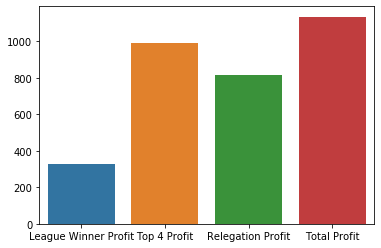

In [321]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

##### 4.2.3 In-Between Analysis - I
    i)Undesirable events with not the worst penalties (i.e worst case scenario excluded) come true
    
<h6>Observation: </h6> Overall below simulation is able to demonstrate that in some case, even if an undesirable outcome happens, which is not so often, our model is able to churn substantial profit.

In [325]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0

for i in range(10000):
    revenue_split_league = np.random.multinomial(rev_prem_winner, list(df["winning_league_risk"]), size=1).tolist()[0]
    for x in range(1,6):
        empty_list = [0.] * 20
        is_true_arr_league = is_true_arr_league = [-1 if idx == x else 0 for idx,j in enumerate(empty_list)]
        league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)

    revenue_split_top_4 = np.random.multinomial(rev_top_4, list(df["top_4_risk"]), size=1).tolist()[0]
    for x in range(4,9):
        empty_list = [0.] * 20
        is_true_arr_top_4 = [-1 if ((idx >= x) & (idx <= x+3)) else 0 for idx,j in enumerate(empty_list)]
        top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(rev_relegation, list(df["relegation_risk"]), size=1).tolist()[0]
    for x in range(9,14):
        empty_list = [0.] * 20
        is_true_arr_relegation = [-1 if ((idx >= x) & (idx <= x+2)) else 0 for idx,j in enumerate(empty_list)]
        relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)

league_winner_profit = (league_winner_profit/50000) + (rev_prem_winner - 1)
top_4_profit = (top_4_profit/50000) + (rev_top_4 - 1)
relegation_profit = (relegation_profit/50000) + (rev_relegation - 1)

Betting Type,Profit
League Winner,303.48
Top 4,782.2
Relegation,678.4
Total,764.08


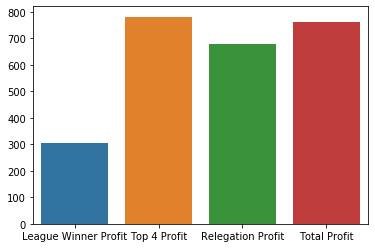

In [326]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

##### 4.2.4 In-Between Analysis - II
    i)Some desirable events come true whilst some other events don't come true
    
<h6>Observation: </h6> Model performance is very close to the best case scenario, with the model churning a substantial profit even when the results are a mixed bag.

In [327]:
revenue = 1
league_winner_profit = 0
top_4_profit = 0
relegation_profit = 0

for i in range(10000):
    revenue_split_league = np.random.multinomial(rev_prem_winner, list(df["winning_league_risk"]), size=1).tolist()[0]
    for x in range(0,3):
        empty_list = [0.] * 20
        is_true_arr_league = is_true_arr_league = [-1 if idx == x else 0 for idx,j in enumerate(empty_list)]
        league_winner_profit += GetProfits(revenue, revenue_split_league, is_true_arr_league, league_winner_odds)

    revenue_split_top_4 = np.random.multinomial(rev_top_4, list(df["top_4_risk"]), size=1).tolist()[0]
    for x in range(0,3):
        empty_list = [0.] * 20
        is_true_arr_top_4 = [-1 if ((idx >= x) & (idx <= x+3)) else 0 for idx,j in enumerate(empty_list)]
        top_4_profit += GetProfits(revenue, revenue_split_top_4, is_true_arr_top_4, top_4_odds)

    revenue_split_relegation = np.random.multinomial(rev_relegation, list(df["relegation_risk"]), size=1).tolist()[0]
    for x in range(15,18):
        empty_list = [0.] * 20
        is_true_arr_relegation = [-1 if ((idx >= x) & (idx <= x+2)) else 0 for idx,j in enumerate(empty_list)]
        relegation_profit += GetProfits(revenue, revenue_split_relegation, is_true_arr_relegation, relegation_odds)



league_winner_profit = (league_winner_profit/30000) + (rev_prem_winner - 1)
top_4_profit = (top_4_profit/30000) + (rev_top_4 - 1)
relegation_profit = (relegation_profit/30000) + (rev_relegation - 1)

Betting Type,Profit
League Winner,321.63
Top 4,966.61
Relegation,794.68
Total,1082.92


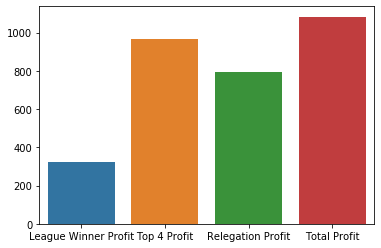

In [328]:
GetProfitReport(league_winner_profit, top_4_profit, relegation_profit)

## 5. Conclusion

Baring few extreme scenarios through the above simulation analysis and modelling we were able to demonstrate on most cases that the model is profitable provided that on an average revenue (betting) on each category is at least 700 dollars (for most cases). A deep dive into different scenarios revealed some interesting insights, for instance if we can manage gamblers to uniformly spend the revenue on the Premier League Winner Category then profits increase by a higher rate compared to others. Overall Top 4 is the safest option for the Gamblers given that they've a high probablity of getting it right, and likewise profits for the betting company does not increase with the same rate as it increases for PL Winner Category. Overall our model is a highly profitable model if we manage to atleast purchase gambles worth of 1000 dollars for each category.